# Training Data EDA and Cleaning

## 1. Import libraries and load helper functions
This cell imports pandas, matplotlib, and a custom function for loading the training data.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from utils import load_training_df

## 2. Load temporal training data and inspect columns
This cell loads the training data at the frame level and prints the first few rows and column names to understand the structure.

In [4]:
df_temp = load_training_df(method='inner', temporal=True)
print(df_temp.head())
print(df_temp.columns)

      game_id  play_id  player_to_predict  nfl_id  frame_id play_direction  \
0  2023090700      101               True   46137         1          right   
1  2023090700      101               True   46137         2          right   
2  2023090700      101               True   46137         3          right   
3  2023090700      101               True   46137         4          right   
4  2023090700      101               True   46137         5          right   

   absolute_yardline_number  player_name player_height  player_weight  ...  \
0                        42  Justin Reid           6-1            204  ...   
1                        42  Justin Reid           6-1            204  ...   
2                        42  Justin Reid           6-1            204  ...   
3                        42  Justin Reid           6-1            204  ...   
4                        42  Justin Reid           6-1            204  ...   

  y_input     s     a     dir       o  num_frames_output  ball

## 3. Explore frame distribution per play
This cell visualizes the distribution of frame counts per play, which helps identify plays with unusual lengths or missing frames.

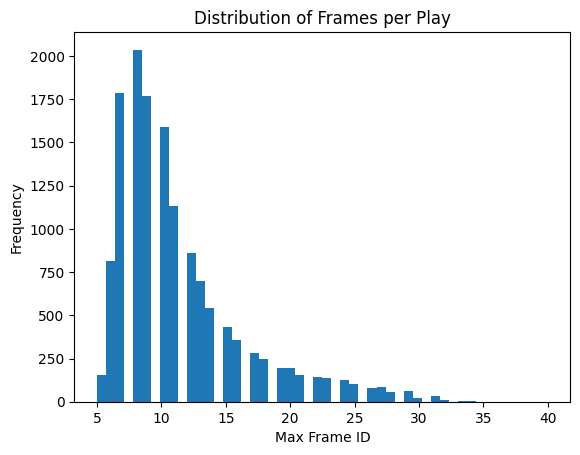

In [5]:
max_frames =df_temp.groupby(['game_id', 'play_id'])['frame_id'].max()
max_frames.plot(kind='hist', bins=50, title='Distribution of Frames per Play')
plt.xlabel('Max Frame ID')
plt.show()

## 4. Analyze play direction and play counts
This cell examines the number of unique plays by direction and game, which can reveal imbalances or missing data in certain directions.

In [6]:
# Get the number of unique play_id per play_direction and game_id
play_counts = df_temp.groupby(['play_direction', 'game_id'])['play_id'].nunique()
# Sum the unique play counts for each play_direction independently
play_direction_sums = play_counts.groupby('play_direction').sum()
print(play_direction_sums)

play_direction
left     6991
right    7117
Name: play_id, dtype: int64


## 5. Load static (play-level) data
This cell loads the training data at the play level, aggregating to the last frame for each player in each play.

In [7]:
df_static = load_training_df(method='inner', temporal=False)

## 6. Unique player roles and positions
These cells visualize the distribution of player roles and positions, helping to spot rare or missing categories.

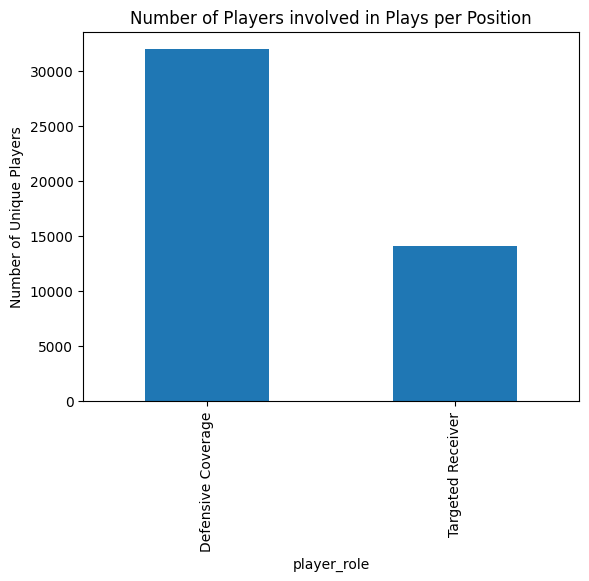

In [8]:
unique_players = df_static.drop_duplicates(subset=['game_id', 'play_id', 'nfl_id'])
role_counts = unique_players['player_role'].value_counts()
role_counts.plot(kind='bar', title='Number of Players involved in Plays per Position')
plt.xlabel('player_role')
plt.ylabel('Number of Unique Players')
plt.show()

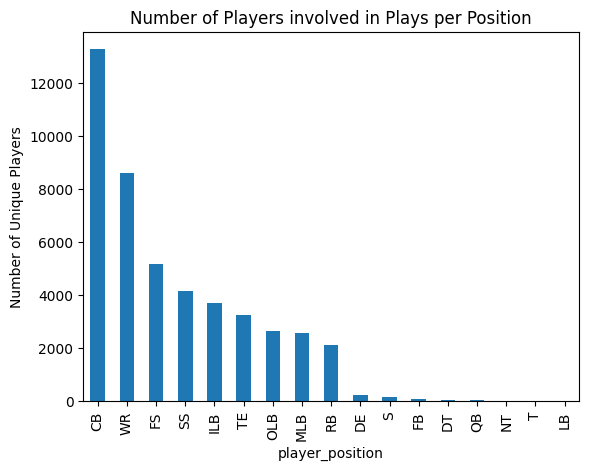

In [9]:
position_counts = unique_players['player_position'].value_counts()
position_counts.plot(kind='bar', title='Number of Players involved in Plays per Position')
plt.xlabel('player_position')
plt.ylabel('Number of Unique Players')
plt.show()

In [10]:
# Check missing values and data types in temporal data
print('Temporal Data Missing Values:')
print(df_temp.isnull().sum())
print('\nTemporal Data Types:')
print(df_temp.dtypes)

Temporal Data Missing Values:
game_id                     0
play_id                     0
player_to_predict           0
nfl_id                      0
frame_id                    0
play_direction              0
absolute_yardline_number    0
player_name                 0
player_height               0
player_weight               0
player_birth_date           0
player_position             0
player_side                 0
player_role                 0
x_input                     0
y_input                     0
s                           0
a                           0
dir                         0
o                           0
num_frames_output           0
ball_land_x                 0
ball_land_y                 0
x_target                    0
y_target                    0
dtype: int64

Temporal Data Types:
game_id                       int64
play_id                       int64
player_to_predict              bool
nfl_id                        int64
frame_id                      int64
play_

In [11]:
# Check missing values and data types in static data
print('Static Data Missing Values:')
print(df_static.isnull().sum())
print('\nStatic Data Types:')
print(df_static.dtypes)

Static Data Missing Values:
game_id                     0
play_id                     0
nfl_id                      0
player_to_predict           0
play_direction              0
absolute_yardline_number    0
player_name                 0
player_height               0
player_weight               0
player_birth_date           0
player_position             0
player_side                 0
player_role                 0
x_input                     0
y_input                     0
s                           0
a                           0
dir                         0
o                           0
num_frames_output           0
ball_land_x                 0
ball_land_y                 0
frame_id                    0
x_target                    0
y_target                    0
dtype: int64

Static Data Types:
game_id                       int64
play_id                       int64
nfl_id                        int64
player_to_predict              bool
play_direction               object
absolute_

In [12]:
# Summarize numerical columns in temporal data
print('Temporal Data Numerical Summary:')
print(df_temp.describe())

Temporal Data Numerical Summary:
            game_id        play_id         nfl_id       frame_id  \
count  5.604260e+05  560426.000000  560426.000000  560426.000000   
mean   2.023156e+09    2218.369490   49649.474284       7.749182   
std    2.022453e+05    1246.748063    5087.692138       5.546510   
min    2.023091e+09      54.000000   30842.000000       1.000000   
25%    2.023101e+09    1183.000000   45395.000000       4.000000   
50%    2.023111e+09    2204.000000   52423.000000       7.000000   
75%    2.023121e+09    3279.000000   54496.000000      10.000000   
max    2.024011e+09    5258.000000   56673.000000      40.000000   

       absolute_yardline_number  player_weight        x_input        y_input  \
count             560426.000000  560426.000000  560426.000000  560426.000000   
mean                  60.395003     208.459748      60.322071      26.726465   
std                   23.094026      21.723023      23.305106      10.139143   
min                   11.000000   

In [13]:
# Summarize categorical columns in temporal data
print('Temporal Data Categorical Summary:')
for col in df_temp.select_dtypes(include='object').columns:
    print(f'\n{col} value counts:')
    print(df_temp[col].value_counts(dropna=False))

Temporal Data Categorical Summary:

play_direction value counts:
play_direction
right    281728
left     278698
Name: count, dtype: int64

player_name value counts:
player_name
Brandon Stephens       2241
Cameron Sutton         2208
Benjamin St-Juste      2166
James Bradberry        2148
Ahkello Witherspoon    2133
                       ... 
Javon Hargrave            6
John FitzPatrick          6
Dominique Robinson        5
Sean Tucker               5
Kenyan Drake              5
Name: count, Length: 1177, dtype: int64

player_height value counts:
player_height
6-1     113139
6-0     111477
6-2      82225
5-11     70054
6-3      46692
5-10     44638
6-4      33541
5-9      24842
6-5      19724
6-6       7061
5-8       4801
6-7        902
5-7        625
6-8        386
5-6        309
6-9         10
Name: count, dtype: int64

player_birth_date value counts:
player_birth_date
1993-01-22    3388
1999-03-03    3021
1999-04-19    2888
1999-06-16    2704
1996-07-08    2695
              ... 
1

In [14]:
# Summarize numerical columns in static data
print('Static Data Numerical Summary:')
print(df_static.describe())

Static Data Numerical Summary:
            game_id        play_id         nfl_id  absolute_yardline_number  \
count  5.629360e+05  562936.000000  562936.000000             562936.000000   
mean   2.023156e+09    2219.785841   49647.292742                 60.359034   
std    2.020189e+05    1246.443129    5089.634979                 23.100056   
min    2.023091e+09      54.000000   30842.000000                 11.000000   
25%    2.023101e+09    1185.000000   45395.000000                 41.000000   
50%    2.023111e+09    2207.000000   52423.000000                 60.000000   
75%    2.023121e+09    3278.000000   54496.000000                 79.000000   
max    2.024011e+09    5258.000000   56673.000000                109.000000   

       player_weight        x_input        y_input              s  \
count  562936.000000  562936.000000  562936.000000  562936.000000   
mean      208.435440      60.253383      26.666116       4.811613   
std        21.713407      24.038294      11.788756

In [15]:
# Summarize categorical columns in static data
print('Static Data Categorical Summary:')
for col in df_static.select_dtypes(include='object').columns:
    print(f'\n{col} value counts:')
    print(df_static[col].value_counts(dropna=False))

Static Data Categorical Summary:

play_direction value counts:
play_direction
right    282609
left     280327
Name: count, dtype: int64

player_name value counts:
player_name
Brandon Stephens      2258
Cameron Sutton        2208
James Bradberry       2175
Benjamin St-Juste     2169
Tyrann Mathieu        2164
                      ... 
DeForest Buckner         6
John FitzPatrick         6
Dominique Robinson       5
Kenyan Drake             5
Sean Tucker              5
Name: count, Length: 1177, dtype: int64

player_height value counts:
player_height
6-1     113758
6-0     112288
6-2      82432
5-11     70430
6-3      46854
5-10     44761
6-4      33582
5-9      24957
6-5      19763
6-6       7063
5-8       4815
6-7        902
5-7        626
6-8        386
5-6        309
6-9         10
Name: count, dtype: int64

player_birth_date value counts:
player_birth_date
1993-01-22    3407
1999-03-03    3025
1999-04-19    2911
1999-06-16    2714
1996-07-08    2706
              ... 
1997-12-28    

## 7. Next steps: Data cleaning and further EDA
The following cells will:
- Check for missing values and data types
- Summarize numerical and categorical columns
- Identify outliers and unusual values
- Suggest areas needing cleaning

## 8. Identify outliers and unusual values
The following cell will plot distributions for selected numerical columns to help spot outliers and data quality issues.

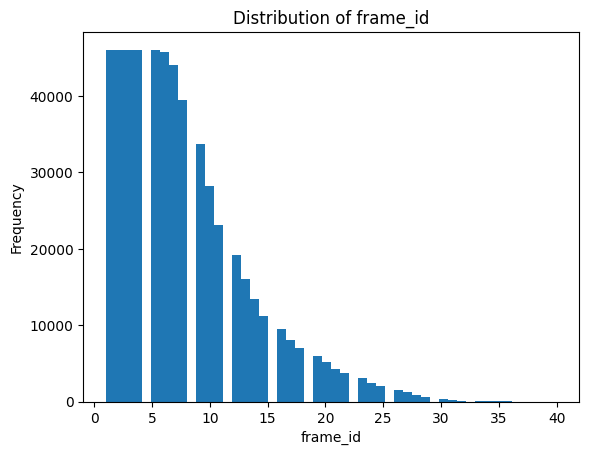

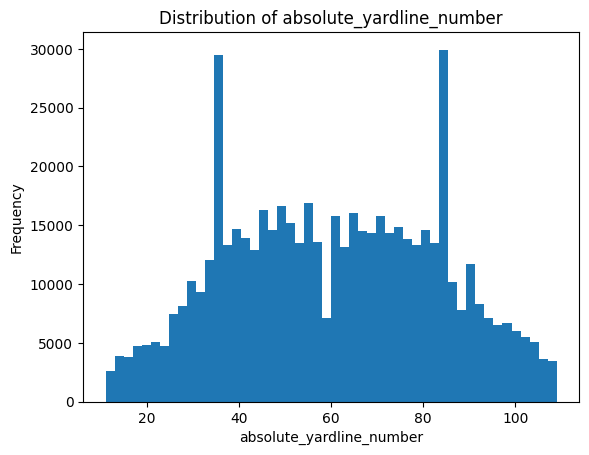

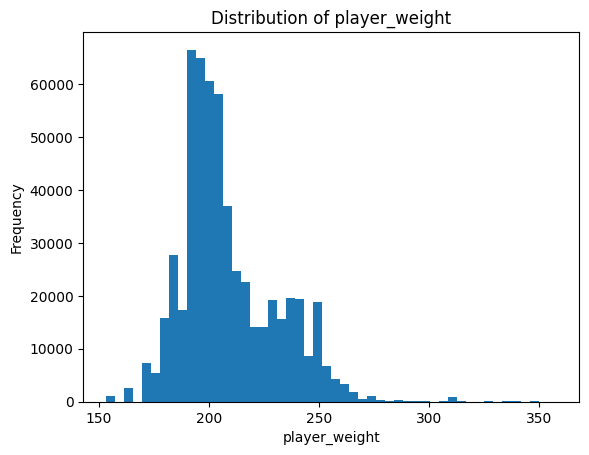

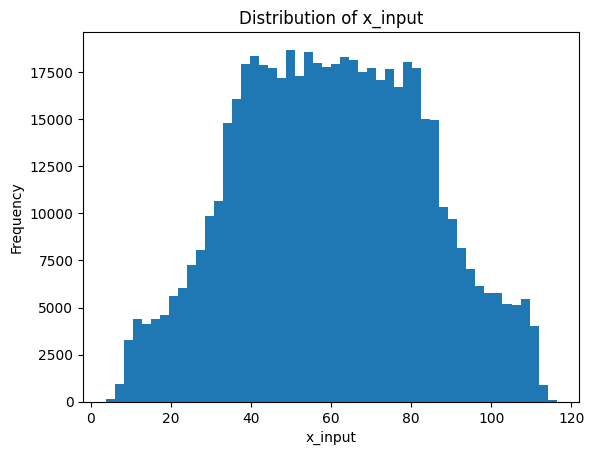

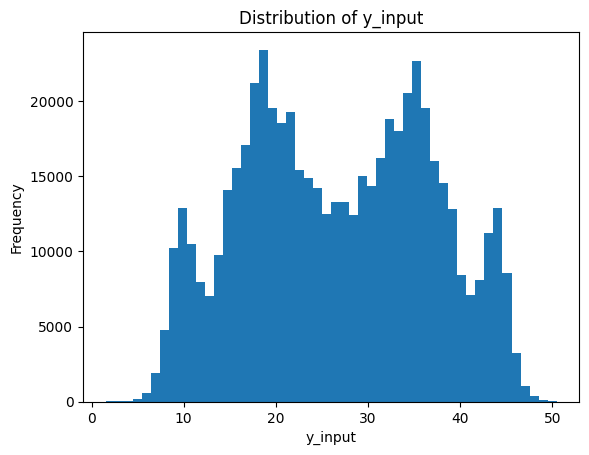

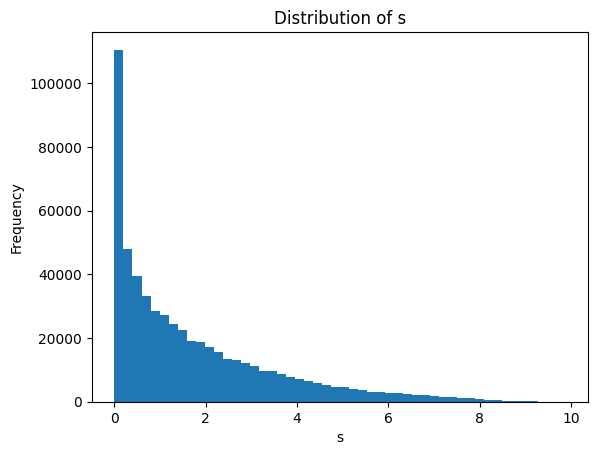

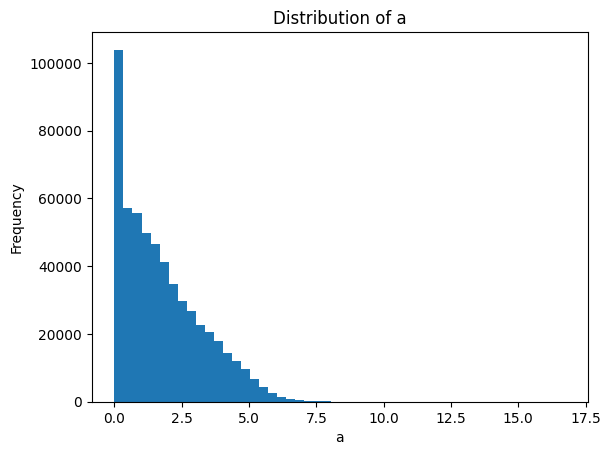

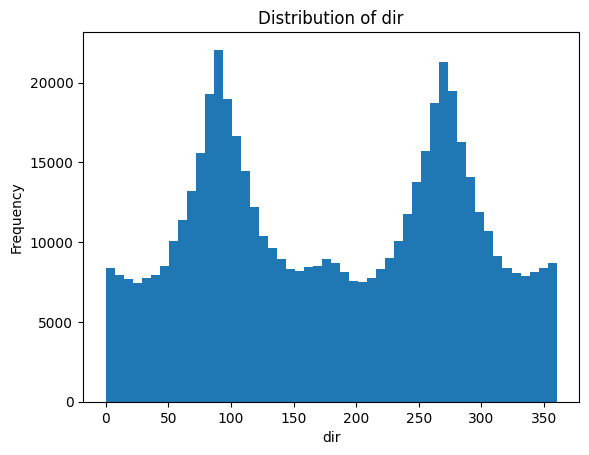

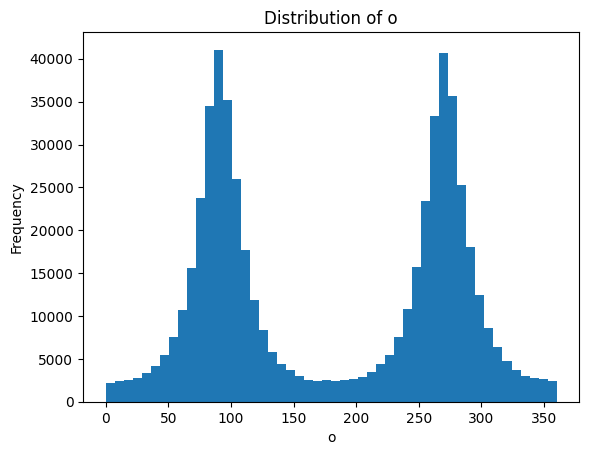

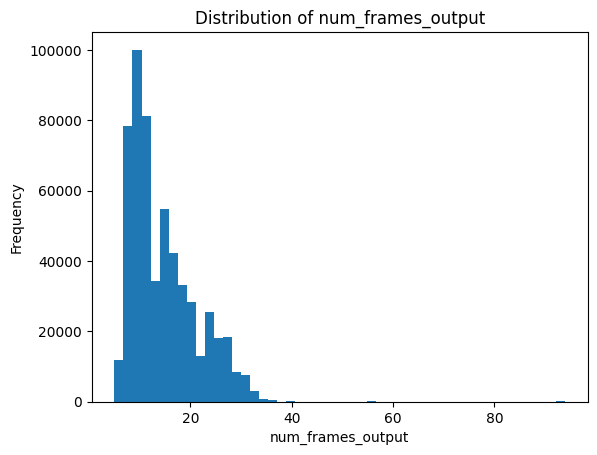

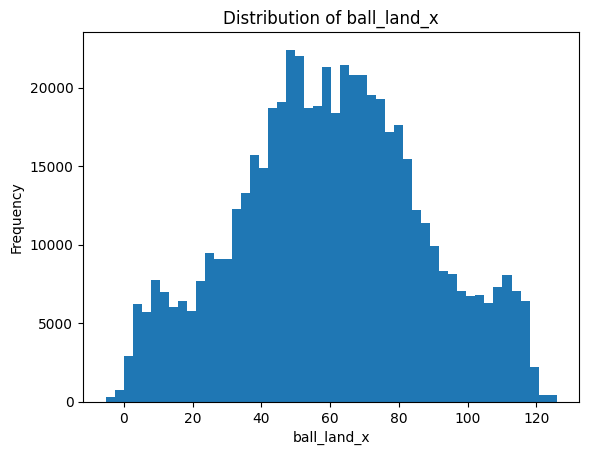

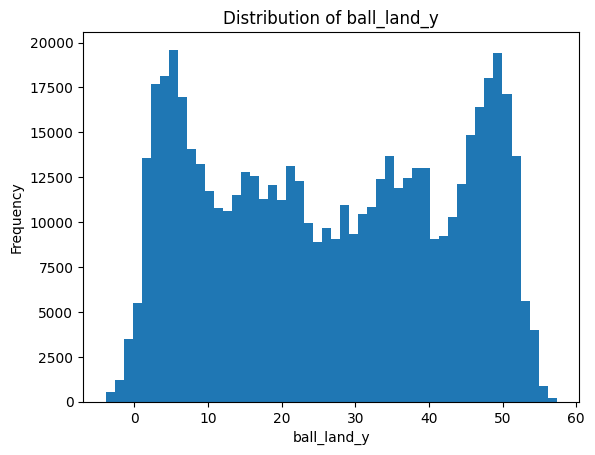

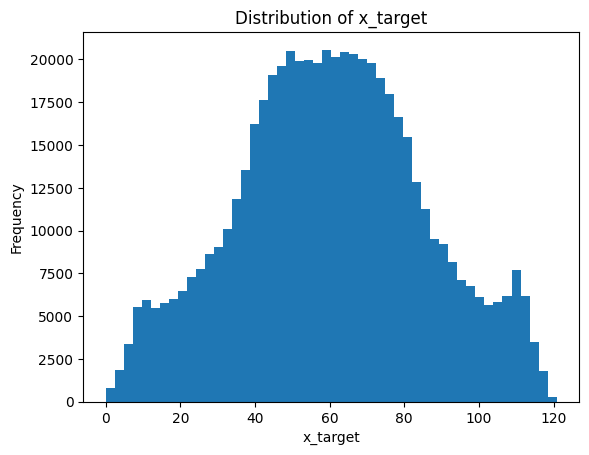

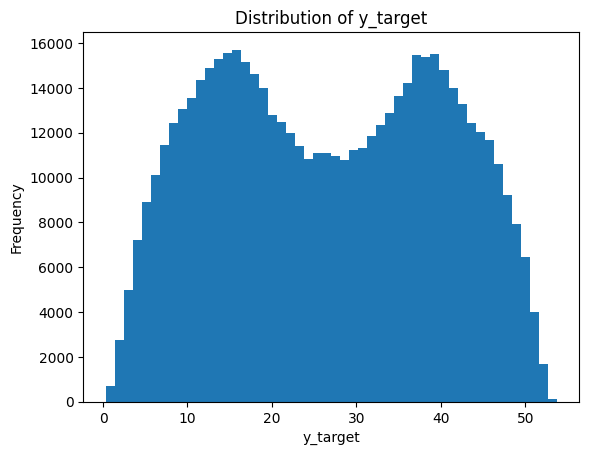

In [17]:
# Plot distributions for selected numerical columns in temporal data
num_cols = df_temp.select_dtypes(include=['float64', 'int64']).columns
for col in num_cols:
    if col in ['game_id', 'play_id', 'nfl_id']:
        continue
    df_temp[col].plot(kind='hist', bins=50, title=f'Distribution of {col}')
    plt.xlabel(col)
    plt.show()

## 9. Summary of cleaning needs
Based on the above EDA, this document does not contain any null values or extreme outliers.